In [1]:
import os
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline

In [3]:
root_path = os.getcwd()
path = os.path.join(root_path, 'data/ml-latest-small/')

### Load Movielens dataset

In [21]:
ratings_df = pd.read_csv(os.path.join(path, 'ratings.csv'), encoding='utf-8')
tags_df = pd.read_csv(os.path.join(path, 'tags.csv'), encoding='utf-8')
movies_df = pd.read_csv(os.path.join(path, 'movies.csv'), index_col='movieId', encoding='utf-8')

### Check Dataframe and size

In [22]:
print(ratings_df.shape)
ratings_df.head(3)

(100836, 4)


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224


In [23]:
print(tags_df.shape)
tags_df.head(3)

(3683, 4)


,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992


In [24]:
print(movies_df.shape)
movies_df.head(3)

(9742, 2)


,title,genres
movieId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance


### Exploratory Data Anaylsis

In [27]:
n_unique_users = len(ratings_df['userId'].unique())
print(n_unique_users)

610


In [29]:
n_unique_moview = len(ratings_df['movieId'].unique())
print(n_unique_moview)

9724


In [31]:
print(ratings_df['movieId'].mean())
print(ratings_df['rating'].mean())

19435.2957177992
3.501556983616962


In [32]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [33]:
ratings_df.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [35]:
# nan 값 확인
ratings_df.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

<AxesSubplot:>

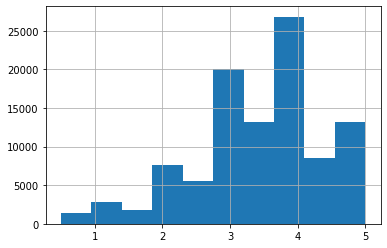

In [38]:
ratings_df['rating'].hist()

In [42]:
# userId 와 rating을 기준으로 기초통계량 확인
ratings_df.groupby(['userId']).mean()

,movieId,rating,timestamp
userId,,,
1,1854.603448,4.366379,9.649856e+08
2,70350.275862,3.948276,1.445715e+09
3,7058.384615,2.435897,1.306464e+09
4,1982.129630,3.555556,9.658643e+08
5,343.840909,3.636364,8.474351e+08
...,...,...,...
606,9692.197309,3.657399,1.179512e+09
607,1860.636364,3.786096,9.647841e+08
608,4502.605295,3.134176,1.122668e+09


In [47]:
userid_rating_df = pd.DataFrame({'count': ratings_df.groupby(['userId', 'rating']).size()})
userid_rating_df = userid_rating_df.reset_index()
userid_rating_df.head(10)

,userId,rating,count
0,1,1.0,1
1,1,2.0,5
2,1,3.0,26
3,1,4.0,76
4,1,5.0,124
5,2,2.0,1
6,2,2.5,1
7,2,3.0,4
8,2,3.5,4
9,2,4.0,9


In [52]:
user_info = ratings_df.groupby('userId')['movieId'].count()
user_info.describe()

count     610.000000
mean      165.304918
std       269.480584
min        20.000000
25%        35.000000
50%        70.500000
75%       168.000000
max      2698.000000
Name: movieId, dtype: float64

In [55]:
import seaborn as sns

c:\my_code\recommendation_system\venv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

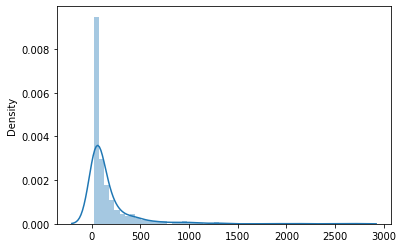

In [56]:
# user 가 몇개의 영화에 대해 rating을 했는지 분포 확인
sns.distplot(user_info.values)

In [59]:
# user 가 평균적으로 준 평점과 평점을 준 영화의 수

stats_df = pd.DataFrame({
    'movie_count': ratings_df.groupby('userId')['movieId'].count(),
    'rating_avg': ratings_df.groupby('userId')['rating'].mean(),
    'rating_std': ratings_df.groupby('userId')['rating'].std()
})
print(stats_df.shape)
display(stats_df.head())

(610, 3)


,movie_count,rating_avg,rating_std
userId,,,
1,232,4.366379,0.800048
2,29,3.948276,0.805615
3,39,2.435897,2.090642
4,216,3.555556,1.314204
5,44,3.636364,0.990441


In [61]:
# rating이 많은 영화 확인
movieid_user_df = pd.DataFrame({
    'num_users_watch': ratings_df.groupby('movieId')['userId'].count(),
    'avg_ratings': ratings_df.groupby('movieId')['rating'].mean(),
    'std_ratings': ratings_df.groupby('movieId')['rating'].std()
})
movieid_user_df = movieid_user_df.reset_index()
print(movieid_user_df.shape)
display(movieid_user_df.head())

(9724, 4)


,movieId,num_users_watch,avg_ratings,std_ratings
0,1,215,3.920930,0.834859
1,2,110,3.431818,0.881713
2,3,52,3.259615,1.054823
3,4,7,2.357143,0.852168
4,5,49,3.071429,0.907148


In [62]:
movieid_user_df.sort_values(by='num_users_watch', ascending=False)

,movieId,num_users_watch,avg_ratings,std_ratings
314,356,329,4.164134,0.831244
277,318,317,4.429022,0.713019
257,296,307,4.197068,0.951997
510,593,279,4.161290,0.853983
1938,2571,278,4.192446,0.975243
...,...,...,...,...
3053,4093,1,1.500000,NaN
3049,4089,1,2.000000,NaN
6687,58351,1,4.000000,NaN
3045,4083,1,4.000000,NaN


<AxesSubplot:>

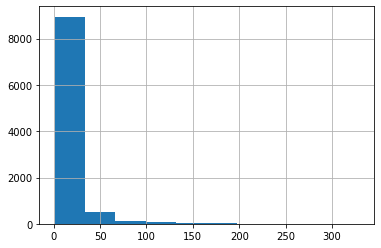

In [63]:
# 롱테일 법칙 확인
movieid_user_df['num_users_watch'].hist()

In [64]:
# 1번 또는 1명만 평점을 준 영화
movieid_user_df['movieId'][movieid_user_df.num_users_watch == 1].count()

3446

In [65]:
# 3번 미만의 영화
movieid_user_df['movieId'][movieid_user_df.num_users_watch < 3].count()

4744

In [67]:
# 평점이 높은 영화(장르), 평점을 많이 받은 영화(장르)
movies_df.head()

,title,genres
movieId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [68]:
# 평점을 많이 받은 영화
ratings_count_df = ratings_df.groupby('movieId')['userId'].count()
ratings_count_df.head()

movieId
1    215
2    110
3     52
4      7
5     49
Name: userId, dtype: int64

In [69]:
df = pd.DataFrame({
    'ratings_count': ratings_df.groupby('movieId')['userId'].count(),
})

In [70]:
df['movie_name'] = df.apply(lambda x: movies_df['title'].loc[x.index])

In [72]:
df.head()

,ratings_count,movie_name
movieId,,
1,215,Toy Story (1995)
2,110,Jumanji (1995)
3,52,Grumpier Old Men (1995)
4,7,Waiting to Exhale (1995)
5,49,Father of the Bride Part II (1995)


In [73]:
df.sort_values(by='ratings_count', ascending=False)

,ratings_count,movie_name
movieId,,
356,329,Forrest Gump (1994)
318,317,"Shawshank Redemption, The (1994)"
296,307,Pulp Fiction (1994)
593,279,"Silence of the Lambs, The (1991)"
2571,278,"Matrix, The (1999)"
...,...,...
4093,1,Cop (1988)
4089,1,Born in East L.A. (1987)
58351,1,City of Men (Cidade dos Homens) (2007)


<AxesSubplot:>

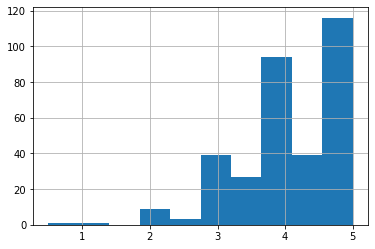

In [74]:
# 356번 영화 평점분포 확인
ratings_df[ratings_df.movieId == 356]['rating'].hist()

<AxesSubplot:>

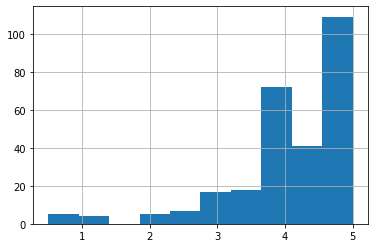

In [76]:
# 2571번 영화 평점분포 확인
ratings_df[ratings_df.movieId == 2571]['rating'].hist()

In [77]:
# 2점 이하로 준 user 확인
ratings_df[(ratings_df.movieId == 356) & (ratings_df.rating < 2)]

,userId,movieId,rating,timestamp
12274,76,356,1.0,1439165536
13553,89,356,0.5,1520408275


<AxesSubplot:>

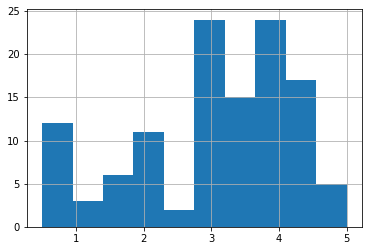

In [81]:
# 76 번 유저의 전체평점분포
ratings_df[ratings_df.userId == 76]['rating'].hist()

In [160]:
# 장르에 대한 분석
all_genres = [x.split('|') for x in movies_df['genres'].values]

In [90]:
import itertools

genres = list(set(list(itertools.chain(*all_genres))))
print(len(all_genres))
print(len(genres))
print(genres)

9742
20
['Drama', 'Mystery', 'Action', '(no genres listed)', 'Crime', 'Fantasy', 'Adventure', 'Western', 'Children', 'IMAX', 'War', 'Film-Noir', 'Sci-Fi', 'Documentary', 'Romance', 'Animation', 'Thriller', 'Horror', 'Comedy', 'Musical']


In [95]:
genres_df = pd.DataFrame(columns=genres, index=movies_df.index)
genres_df.head()

,Drama,Mystery,Action,(no genres listed),Crime,Fantasy,Adventure,Western,Children,IMAX,War,Film-Noir,Sci-Fi,Documentary,Romance,Animation,Thriller,Horror,Comedy,Musical
movieId,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
for i, row in genres_df.iterrows():
    movie_id = row.name
    list_of_genres = movies_df.loc[movie_id]['genres'].split('|')
    
    genres_df.loc[movie_id][list_of_genres]

In [100]:
genres_df = genres_df.fillna(0)
genres_df['num_genres'] = genres_df.sum(axis=1)
genres_df.head()

,Drama,Mystery,Action,(no genres listed),Crime,Fantasy,Adventure,Western,Children,IMAX,...,Film-Noir,Sci-Fi,Documentary,Romance,Animation,Thriller,Horror,Comedy,Musical,num_genres
movieId,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,1,1,0,1,0,...,0,0,0,0,1,0,0,1,0,10.0
2,0,0,0,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,6.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,4.0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,6.0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,2.0


In [104]:
# get_dummies 활용
genres_df = movies_df['genres'].str.get_dummies(sep='|')
genres_df.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movieId,,,,,,,,,,,,,,,,,,,,
1,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [105]:
movies_df = pd.concat([movies_df, genres_df], axis=1)
movies_df.head()

,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movieId,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [106]:
# 특정장르의 평점과 user 분석
movies_df.columns

Index(['title', 'genres', '(no genres listed)', 'Action', 'Adventure',
       'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Fantasy', 'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')

In [109]:
# 애니메이션 장르에 해당하는 영화
movieId_list = movies_df['title'][movies_df.Animation == 1]
movieId_list.index

Int64Index([     1,     13,     48,    239,    313,    364,    551,    558,
               588,    594,
            ...
            182639, 183897, 187541, 190219, 193565, 193567, 193573, 193581,
            193583, 193587],
           dtype='int64', name='movieId', length=611)

In [111]:
animation_df = ratings_df[ratings_df['movieId'].isin(movieId_list.index)]
animation_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
35,1,596,5.0,964982838
38,1,661,5.0,964982838
39,1,673,3.0,964981775
50,1,1023,5.0,964982681


In [113]:
# user 는 애니메이션 장르 영화에 대한 평점 평균
animation_df.groupby('userId')['rating'].mean()

userId
1      4.689655
3      0.500000
4      4.000000
5      4.333333
6      4.071429
         ...   
606    3.714286
607    3.333333
608    3.118182
609    3.000000
610    3.901515
Name: rating, Length: 527, dtype: float64

In [114]:
# 장르간 상관성 확인
genres_df.corr()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
(no genres listed),1.000000,-0.028442,-0.022840,-0.015309,-0.016005,-0.046878,-0.022171,-0.012871,-0.053277,-0.017447,-0.005618,-0.019769,-0.007599,-0.011151,-0.014794,-0.026195,-0.019792,-0.029073,-0.011956,-0.007816
Action,-0.028442,1.000000,0.291949,0.029659,-0.049652,-0.148968,0.154471,-0.099463,-0.152964,0.059931,-0.031649,-0.035443,0.131864,-0.083331,-0.028515,-0.146670,0.233475,0.199042,0.076289,0.021600
Adventure,-0.022840,0.291949,1.000000,0.211472,0.273931,-0.055215,-0.085988,-0.075111,-0.156327,0.262511,-0.030140,-0.098423,0.143982,-0.005544,-0.048427,-0.072584,0.181797,-0.035942,0.010195,0.036136
Animation,-0.015309,0.029659,0.211472,1.000000,0.437376,0.029079,-0.069847,-0.050144,-0.160504,0.196895,-0.015555,-0.062464,0.080744,0.111804,-0.030477,-0.061882,0.064093,-0.107822,-0.036990,-0.024378
Children,-0.016005,-0.049652,0.273931,0.437376,1.000000,0.088701,-0.086442,-0.056859,-0.160742,0.234117,-0.025673,-0.083569,0.062011,0.137072,-0.036449,-0.070189,-0.011910,-0.127716,-0.048341,-0.016890
Comedy,-0.046878,-0.148968,-0.055215,0.029079,0.088701,1.000000,-0.075282,-0.131657,-0.283472,-0.005708,-0.070710,-0.133382,-0.056627,0.045466,-0.127209,0.153088,-0.132400,-0.286289,-0.095919,-0.039622
Crime,-0.022171,0.154471,-0.085988,-0.069847,-0.086442,-0.075282,1.000000,-0.073955,0.063005,-0.086254,0.137141,-0.063805,-0.020892,-0.056850,0.124138,-0.097444,-0.095166,0.265196,-0.059585,-0.022997
Documentary,-0.012871,-0.099463,-0.075111,-0.050144,-0.056859,-0.131657,-0.073955,1.000000,-0.173925,-0.060473,-0.020645,-0.069364,0.003381,-0.005664,-0.050168,-0.093597,-0.072736,-0.104346,-0.013378,-0.024915
Drama,-0.053277,-0.152964,-0.156327,-0.160504,-0.160742,-0.283472,0.063005,-0.173925,1.000000,-0.106337,0.024256,-0.187391,-0.063293,-0.038022,0.027635,0.122454,-0.158325,-0.008267,0.135067,-0.025060
Fantasy,-0.017447,0.059931,0.262511,0.196895,0.234117,-0.005708,-0.086254,-0.060473,-0.106337,1.000000,-0.023962,0.012336,0.102962,0.050524,0.014768,-0.000635,0.046094,-0.057807,-0.043959,-0.021441


<AxesSubplot:>

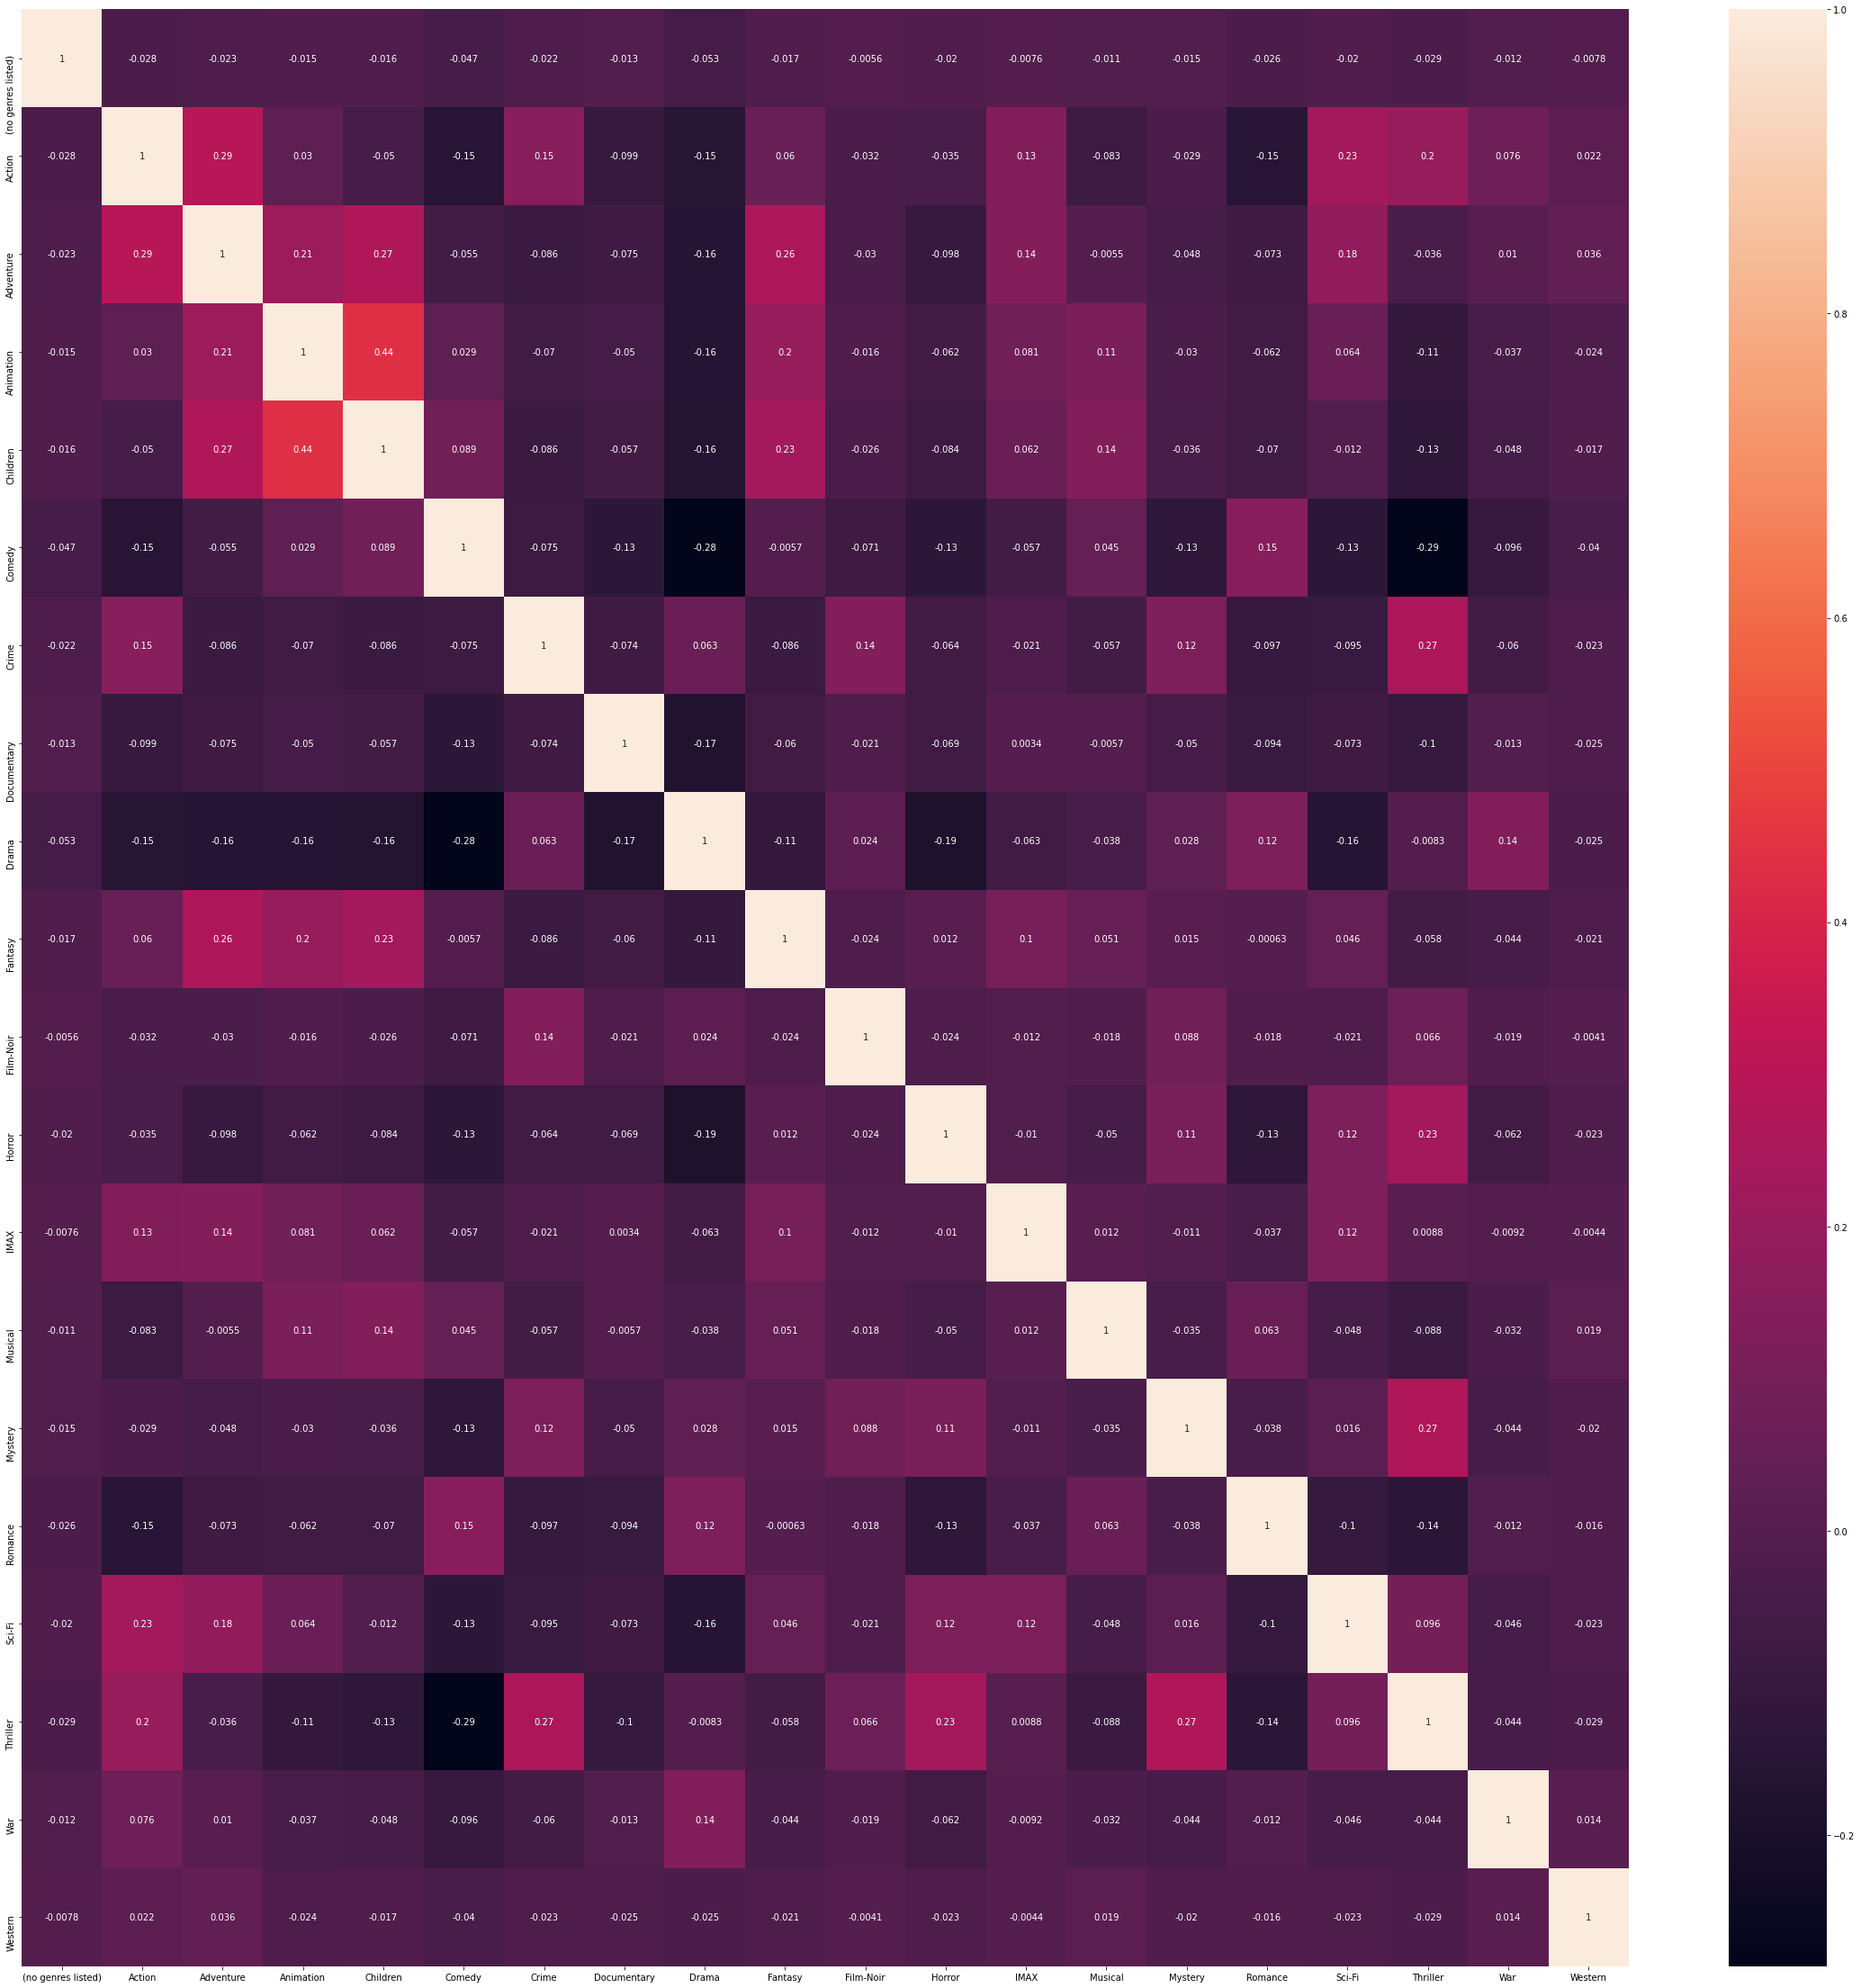

In [115]:
plt.figure(figsize=(40, 40))
sns.heatmap(genres_df.corr(), annot=True)

In [116]:
# 영화 이름, 연도 분석
movies_df.head()

,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movieId,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [143]:
title_df = movies_df.copy()
title_df['year'] = title_df['title'].str.extract('(\(\d\d\d\d\))')
title_df.head()

,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year
movieId,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,(1995)
2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,(1995)
3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,(1995)
4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,(1995)
5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,(1995)


In [137]:
# nan값 확인
title_df['year'].isna().sum()

12

In [149]:
# 연도 또는 장르가 없는 영화 드랍
title_df[title_df['(no genres listed)'] == 1].shape
title_df.dropna(axis=0, inplace=True)
title_df['year'] = title_df['year'].apply(lambda x: x.replace('(', '').replace(')', ''))
title_df.head()

,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year
movieId,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1995
2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1995
3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1995
4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1995
5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1995


In [145]:
# 연도별 출시 영화 분석
year_freq_df = title_df.groupby('year')['title'].count()
year_freq_df

year
1902      1
1903      1
1908      1
1915      1
1916      4
       ... 
2014    278
2015    274
2016    218
2017    147
2018     41
Name: title, Length: 106, dtype: int64

In [146]:
year_freq_df.sort_values(ascending=False)

year
2002    311
2006    295
2001    294
2007    284
2000    283
       ... 
1919      1
1917      1
1915      1
1908      1
1902      1
Name: title, Length: 106, dtype: int64

In [147]:
year_freq_df.describe()

count    106.000000
mean      91.783019
std      102.227757
min        1.000000
25%       16.000000
50%       39.500000
75%      151.500000
max      311.000000
Name: title, dtype: float64

In [150]:
# 2017 개봉연도 영화 평점 분석
title_df[title_df['year'] == '2017']

,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year
movieId,,,,,,,,,,,,,,,,,,,,,
122896,Pirates of the Caribbean: Dead Men Tell No Tal...,(no genres listed),1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2017
122898,Justice League (2017),Action|Adventure|Sci-Fi,0,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,2017
122906,Black Panther (2017),Action|Adventure|Sci-Fi,0,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,2017
122916,Thor: Ragnarok (2017),Action|Adventure|Sci-Fi,0,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,2017
122918,Guardians of the Galaxy 2 (2017),Action|Adventure|Sci-Fi,0,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190215,Liquid Truth (2017),Drama,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2017
191005,Gintama (2017),Action|Adventure|Comedy|Sci-Fi,0,1,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,2017
193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,2017


In [153]:
ratings_df['rating'][ratings_df['movieId'].isin(title_df[title_df['year'] == '2017'].index)].mean()

3.5780911062906724

In [155]:
results = []
for year in title_df['year'].unique():
    avg_ratings = ratings_df['rating'][ratings_df['movieId'].isin(title_df[title_df['year'] == str(year)].index)].mean()
    results.append((year, avg_ratings))

In [156]:
result_df = pd.DataFrame(results, columns=['year', 'avg_ratings'])
result_df.sort_values(by='year')

,year,avg_ratings
91,1902,3.500000
92,1903,2.500000
105,1908,4.000000
84,1915,2.000000
87,1916,3.600000
...,...,...
100,2014,3.512879
101,2015,3.410386
102,2016,3.387261
103,2017,3.578091


array([[<AxesSubplot:title={'center':'avg_ratings'}>]], dtype=object)

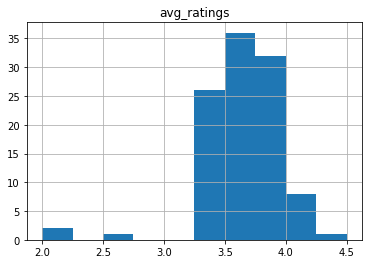

In [159]:
result_df.hist()